## Token Counts per Prompt Figure from Supplementary ##

### (including cases in which the context window was exceeded)

Number of files exceeding 8,000 tokens: 135

Files exceeding 8,000 tokens:
- DB00622.json
- DB14548.json
- DB00321.json
- DB00726.json
- DB08896.json
- DB00248.json
- DB00589.json
- DB06148.json
- DB14533.json
- DB11273.json
- DB09213.json
- DB14840.json
- DB00696.json
- DB13956.json
- DB00454.json
- DB06216.json
- DB00182.json
- DB04315.json
- DB12147.json
- DB06016.json
- DB01403.json
- DB11638.json
- DB01268.json
- DB14011.json
- DB00843.json
- DB00228.json
- DB01049.json
- DB13961.json
- DB00818.json
- DB06077.json
- DB00320.json
- DB10770.json
- DB00273.json
- DB00852.json
- DB09235.json
- DB11886.json
- DB00794.json
- DB00540.json
- DB01392.json
- DB01238.json
- DB12843.json
- DB13751.json
- DB09130.json
- DB01189.json
- DB08804.json
- DB09079.json
- DB09096.json
- DB00170.json
- DB13025.json
- DB09078.json
- DB01262.json
- DB00408.json
- DB04216.json
- DB01043.json
- DB02546.json
- DB01110.json
- DB01239.json
- DB00243.json
- DB13746.json
- DB01645.json
- DB00795.json
- DB14001.

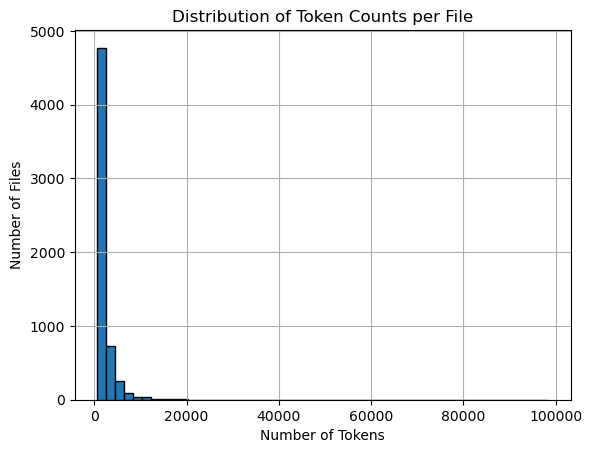

In [8]:
import os
import glob
import json
import matplotlib.pyplot as plt
from typing import List
import tiktoken

def main():
    # Choose the tiktoken encoding
    # Options include 'gpt2', 'cl100k_base', etc.
    # 'cl100k_base' is used by models like GPT-3.5 and GPT-4
    encoding_name = 'cl100k_base'  # Adjust if necessary

    # Initialize the tokenizer
    tokenizer = tiktoken.get_encoding(encoding_name)
    
    # Directory containing JSON files (adjust this path)
    json_dir = '/Users/ricoandreschmitt/Code/GitHub/allmzheimer/JSON_prompts/rating_prompts/directionality_prompts'  # Replace with your directory
    
    # Field in the JSON file that contains the prompt text (adjust if necessary)
    prompt_field = 'prompt'  # Adjust this if your JSON files use a different key
    
    # Get list of JSON files
    json_files = glob.glob(os.path.join(json_dir, '*.json'))
    
    # List to store token counts
    token_counts = []
    
    # Count of files exceeding 8,000 tokens
    count_exceeding_8k = 0

    # List to store filenames of files exceeding 8,000 tokens
    files_exceeding_8k = []
    
    for json_file in json_files:
        with open(json_file, 'r', encoding='utf-8') as f:
            try:
                data = json.load(f)
            except json.JSONDecodeError:
                print(f"Error decoding JSON in file: {json_file}")
                continue
            # Ensure the prompt field exists in the JSON data
            if prompt_field in data:
                text = data[prompt_field]
            else:
                print(f"Field '{prompt_field}' not found in file: {json_file}")
                continue
            
            # Tokenize the text
            tokens = tokenizer.encode(text)
            num_tokens = len(tokens)
            token_counts.append(num_tokens)
            if num_tokens > 8000:
                count_exceeding_8k += 1
                # Add the filename to the list
                files_exceeding_8k.append(os.path.basename(json_file))
    
    # Print the count of files exceeding 8,000 tokens
    print(f"Number of files exceeding 8,000 tokens: {count_exceeding_8k}")

    # If any files exceeded 8,000 tokens, print their names
    if files_exceeding_8k:
        print("\nFiles exceeding 8,000 tokens:")
        for filename in files_exceeding_8k:
            print(f"- {filename}")
    
    # Plot histogram of token counts
    plt.hist(token_counts, bins=50, edgecolor='black')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Number of Files')
    plt.title('Distribution of Token Counts per File')
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
    main()
